# Analyzing Fantasy Football Data

In [84]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

## Importing Data

In [92]:
players = pd.DataFrame()

for year in range(2015, 2020):
   path = 'https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/' + str(year) + '.csv'
   temp = pd.read_csv(path)
   temp = temp.drop('Unnamed: 0', axis=1)
   temp.insert(1, 'Year', year)
   players = pd.concat([players, temp], ignore_index=True)

temp = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')
temp.insert(1, 'Year', 2020)
players = pd.concat([players, temp], ignore_index=True)

In [93]:
players.head()

,Player,Year,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,...,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Antonio Brown,2015,PIT,WR,27.0,16.0,16.0,193.0,136.0,0.0,...,0.0,28.0,0.0,3.0,1834.0,10.0,378.20,0.0,3.0,2.0
1,Devonta Freeman,2015,ATL,RB,23.0,15.0,13.0,97.0,73.0,0.0,...,0.0,1056.0,11.0,265.0,578.0,3.0,316.40,0.0,3.0,2.0
2,Julio Jones,2015,ATL,WR,26.0,16.0,16.0,203.0,136.0,0.0,...,0.0,0.0,0.0,0.0,1871.0,8.0,369.10,0.0,3.0,1.0
3,Adrian Peterson,2015,MIN,RB,30.0,16.0,16.0,36.0,30.0,0.0,...,0.0,1485.0,11.0,327.0,222.0,0.0,260.70,0.0,7.0,3.0
4,Cam Newton,2015,CAR,QB,26.0,16.0,16.0,0.0,0.0,3837.0,...,495.0,636.0,10.0,132.0,0.0,0.0,389.08,10.0,5.0,4.0


In [94]:
# clear out given fantasy points column
players['FantasyPoints'] = 0

# fantasy points lost from fumbles lost and interception
players['FantasyPoints'] -= players['FumblesLost'] * 2
players['FantasyPoints'] -= players['Int'] * 2

# fantasy points gained from passing yds, passing TDs, rushing and receiving yds, and rushing and receiving TDs
players['FantasyPoints'] += players['PassingYds'] / 25
players['FantasyPoints'] += players['PassingTD'] * 4
players['FantasyPoints'] += players['RushingYds'] / 10
players['FantasyPoints'] += players['RushingTD'] * 6
players['FantasyPoints'] += players['ReceivingYds'] / 10
players['FantasyPoints'] += players['ReceivingTD'] * 6

# fantasy points for 0.5 PPR
players['FantasyPoints'] += players['Rec'] / 2

In [145]:
recent = players[players['Year'] == 2020].sort_values('FantasyPoints', ascending=False).reset_index().drop('index', axis=1)

## Exploring Fantasy Point Distributions by Position

In [154]:
def playerLookup(name, df):
    return df[df['Player'] == name]

### Running Backs

Text(0, 0.5, 'CDF')

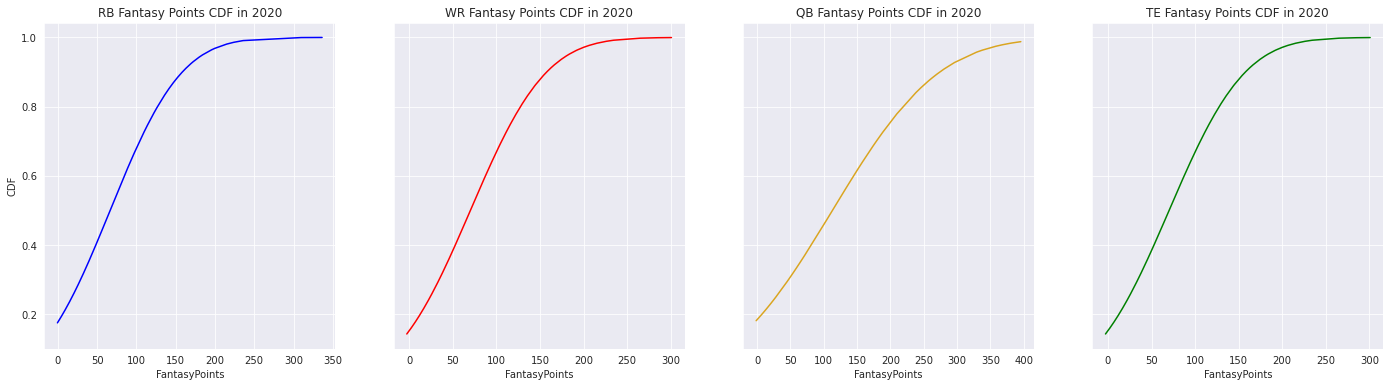

In [242]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24,6), sharey=True)

sns.lineplot(x=recent_rb.FantasyPoints, y=recent_rb_cdf, ax=ax1, color='blue')
ax1.set_title('RB Fantasy Points CDF in 2020')
ax1.set_ylabel('CDF')

sns.lineplot(x=recent_wr.FantasyPoints, y=recent_wr_cdf, ax=ax2, color='red')
ax2.set_title('WR Fantasy Points CDF in 2020')
ax2.set_ylabel('CDF')

sns.lineplot(x=recent_qb.FantasyPoints, y=recent_qb_cdf, ax=ax3, color='goldenrod')
ax3.set_title('QB Fantasy Points CDF in 2020')
ax3.set_ylabel('CDF')

sns.lineplot(x=recent_te.FantasyPoints, y=recent_te_cdf, ax=ax4, color='green')
ax4.set_title('TE Fantasy Points CDF in 2020')
ax4.set_ylabel('CDF')

In [2]:
defense = pd.read_html('http://www.fantasypros.com/nfl/points-allowed.php?year=2020')

row_indices = [i for i in range(1, 64, 2)]
defense = defense[0].drop(row_indices, axis=0).reset_index()